In [1]:
import pandas as pd
import json
import sqlite3
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import firebase_admin
from firebase_admin import credentials, initialize_app, storage
import os
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from bs4 import BeautifulSoup

## Ekstrak Data

### Ekstrak electricity_access_percent.csv

In [2]:
electricity = pd.read_csv("data_source/electricity_access_percent.csv", skiprows=4)
electricity.head()

Country Name Country Code                           Indicator Name  \
0        Aruba          ABW  Access to electricity (% of population)   
1  Afghanistan          AFG  Access to electricity (% of population)   
2       Angola          AGO  Access to electricity (% of population)   
3      Albania          ALB  Access to electricity (% of population)   
4      Andorra          AND  Access to electricity (% of population)   

   Indicator Code  1960  1961  1962  1963  1964  1965  ...        2009  \
0  EG.ELC.ACCS.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   93.354546   
1  EG.ELC.ACCS.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   44.854885   
2  EG.ELC.ACCS.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   32.382469   
3  EG.ELC.ACCS.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...  100.000000   
4  EG.ELC.ACCS.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...  100.000000   

         2010        2011        2012        2013        2014        2015  \
0   93.356292   93.942375   94.255814   94.578262   94.906723   95.238182   
1   42.700000   43.222019   69.100000   67.259552   89.500000   71.500000   
2   33.514950   34.600000   35.821964   36.990490   32.000000   42.000000   
3  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
4  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   

         2016  2017  Unnamed: 62  
0   95.570145   NaN          NaN  
1   84.137138   NaN          NaN  
2   40.520607   NaN          NaN  
3  100.000000   NaN          NaN  
4  100.000000   NaN          NaN  

[5 rows x 63 columns]

### Ekstrak population_data.csv

In [3]:
population_csv = pd.read_csv("data_source/population_data.csv", skiprows=4)
population_csv

Country Name Country Code     Indicator Name Indicator Code        1960  \
0           Aruba          ABW  Population, total    SP.POP.TOTL     54211.0   
1     Afghanistan          AFG  Population, total    SP.POP.TOTL   8996351.0   
2          Angola          AGO  Population, total    SP.POP.TOTL   5643182.0   
3         Albania          ALB  Population, total    SP.POP.TOTL   1608800.0   
4         Andorra          AND  Population, total    SP.POP.TOTL     13411.0   
..            ...          ...                ...            ...         ...   
259        Kosovo          XKX  Population, total    SP.POP.TOTL    947000.0   
260   Yemen, Rep.          YEM  Population, total    SP.POP.TOTL   5172135.0   
261  South Africa          ZAF  Population, total    SP.POP.TOTL  17456855.0   
262        Zambia          ZMB  Population, total    SP.POP.TOTL   3044846.0   
263      Zimbabwe          ZWE  Population, total    SP.POP.TOTL   3747369.0   

           1961        1962        1963        1964        1965  ...  \
0       55438.0     56225.0     56695.0     57032.0     57360.0  ...   
1     9166764.0   9345868.0   9533954.0   9731361.0   9938414.0  ...   
2     5753024.0   5866061.0   5980417.0   6093321.0   6203299.0  ...   
3     1659800.0   1711319.0   1762621.0   1814135.0   1864791.0  ...   
4       14375.0     15370.0     16412.0     17469.0     18549.0  ...   
..          ...         ...         ...         ...         ...  ...   
259    966000.0    994000.0   1022000.0   1050000.0   1078000.0  ...   
260   5260501.0   5351799.0   5446063.0   5543339.0   5643643.0  ...   
261  17920673.0  18401608.0  18899275.0  19412975.0  19942303.0  ...   
262   3140264.0   3240587.0   3345145.0   3452942.0   3563407.0  ...   
263   3870756.0   3999419.0   4132756.0   4269863.0   4410212.0  ...   

           2009        2010        2011        2012        2013        2014  \
0      101453.0    101669.0    102053.0    102577.0    103187.0    103795.0   
1    28004331.0  28803167.0  29708599.0  30696958.0  31731688.0  32758020.0   
2    22549547.0  23369131.0  24218565.0  25096150.0  25998340.0  26920466.0   
3     2927519.0   2913021.0   2905195.0   2900401.0   2895092.0   2889104.0   
4       84462.0     84449.0     83751.0     82431.0     80788.0     79223.0   
..          ...         ...         ...         ...         ...         ...   
259   1761474.0   1775680.0   1791000.0   1805200.0   1824100.0   1821800.0   
260  22974929.0  23606779.0  24252206.0  24909969.0  25576322.0  26246327.0   
261  50970818.0  51584663.0  52263516.0  52998213.0  53767396.0  54539571.0   
262  13456417.0  13850033.0  14264756.0  14699937.0  15153210.0  15620974.0   
263  13810599.0  14086317.0  14386649.0  14710826.0  15054506.0  15411675.0   

           2015        2016        2017  Unnamed: 62  
0      104341.0    104822.0    105264.0          NaN  
1    33736494.0  34656032.0  35530081.0          NaN  
2    27859305.0  28813463.0  29784193.0          NaN  
3     2880703.0   2876101.0   2873457.0          NaN  
4       78014.0     77281.0     76965.0          NaN  
..          ...         ...         ...          ...  
259   1801800.0   1816200.0   1830700.0          NaN  
260  26916207.0  27584213.0  28250420.0          NaN  
261  55291225.0  56015473.0  56717156.0          NaN  
262  16100587.0  16591390.0  17094130.0          NaN  
263  15777451.0  16150362.0  16529904.0          NaN  

[264 rows x 63 columns]

### Ektrak gdp_data.csv

In [4]:
gdp = pd.read_csv("data_source/gdp_data.csv", skiprows=4)
gdp.head()

Country Name Country Code     Indicator Name  Indicator Code          1960  \
0        Aruba          ABW  GDP (current US$)  NY.GDP.MKTP.CD           NaN   
1  Afghanistan          AFG  GDP (current US$)  NY.GDP.MKTP.CD  5.377778e+08   
2       Angola          AGO  GDP (current US$)  NY.GDP.MKTP.CD           NaN   
3      Albania          ALB  GDP (current US$)  NY.GDP.MKTP.CD           NaN   
4      Andorra          AND  GDP (current US$)  NY.GDP.MKTP.CD           NaN   

           1961          1962          1963          1964          1965  ...  \
0           NaN           NaN           NaN           NaN           NaN  ...   
1  5.488889e+08  5.466667e+08  7.511112e+08  8.000000e+08  1.006667e+09  ...   
2           NaN           NaN           NaN           NaN           NaN  ...   
3           NaN           NaN           NaN           NaN           NaN  ...   
4           NaN           NaN           NaN           NaN           NaN  ...   

           2009          2010          2011          2012          2013  \
0  2.498933e+09  2.467704e+09  2.584464e+09           NaN           NaN   
1  1.248694e+10  1.593680e+10  1.793024e+10  2.053654e+10  2.026425e+10   
2  7.549239e+10  8.252614e+10  1.041158e+11  1.139232e+11  1.249125e+11   
3  1.204421e+10  1.192695e+10  1.289087e+10  1.231978e+10  1.277628e+10   
4  3.660531e+09  3.355695e+09  3.442063e+09  3.164615e+09  3.281585e+09   

           2014          2015          2016          2017  Unnamed: 62  
0           NaN           NaN           NaN           NaN          NaN  
1  2.061610e+10  1.921556e+10  1.946902e+10  2.081530e+10          NaN  
2  1.267302e+11  1.026212e+11  9.533720e+10  1.242094e+11          NaN  
3  1.322824e+10  1.138693e+10  1.188368e+10  1.303935e+10          NaN  
4  3.350736e+09  2.811489e+09  2.877312e+09  3.012914e+09          NaN  

[5 rows x 63 columns]

### Ekstrak data rural_population_percent

In [5]:
rural = pd.read_csv("data_source/rural_population_percent.csv", skiprows=4)
rural.head()

Country Name Country Code                            Indicator Name  \
0        Aruba          ABW  Rural population (% of total population)   
1  Afghanistan          AFG  Rural population (% of total population)   
2       Angola          AGO  Rural population (% of total population)   
3      Albania          ALB  Rural population (% of total population)   
4      Andorra          AND  Rural population (% of total population)   

   Indicator Code    1960    1961    1962    1963    1964    1965  ...  \
0  SP.RUR.TOTL.ZS  49.224  49.239  49.254  49.270  49.285  49.300  ...   
1  SP.RUR.TOTL.ZS  91.779  91.492  91.195  90.890  90.574  90.250  ...   
2  SP.RUR.TOTL.ZS  89.565  89.202  88.796  88.376  87.942  87.496  ...   
3  SP.RUR.TOTL.ZS  69.295  69.057  68.985  68.914  68.842  68.770  ...   
4  SP.RUR.TOTL.ZS  41.550  39.017  36.538  34.128  31.795  29.555  ...   

     2009    2010    2011    2012    2013    2014    2015    2016    2017  \
0  56.579  56.941  57.302  57.636  57.942  58.221  58.472  58.696  58.893   
1  75.687  75.311  74.926  74.532  74.129  73.718  73.297  72.868  72.430   
2  60.701  59.903  59.100  58.301  57.510  56.726  55.950  55.181  54.422   
3  48.924  47.837  46.753  45.670  44.617  43.591  42.593  41.624  40.684   
4  11.648  12.183  12.740  13.292  13.835  14.367  14.885  15.388  15.873   

   Unnamed: 62  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 63 columns]

### Ekstrak population_data.json

In [6]:
with open('data_source/population_data.json', 'r') as file:
    data_json = json.load(file)

population_json = pd.DataFrame(data_json)

population_json.head()

Country Name Country Code     Indicator Name Indicator Code       1960  \
0        Aruba          ABW  Population, total    SP.POP.TOTL    54211.0   
1  Afghanistan          AFG  Population, total    SP.POP.TOTL  8996351.0   
2       Angola          AGO  Population, total    SP.POP.TOTL  5643182.0   
3      Albania          ALB  Population, total    SP.POP.TOTL  1608800.0   
4      Andorra          AND  Population, total    SP.POP.TOTL    13411.0   

        1961       1962       1963       1964       1965  ...        2008  \
0    55438.0    56225.0    56695.0    57032.0    57360.0  ...    101353.0   
1  9166764.0  9345868.0  9533954.0  9731361.0  9938414.0  ...  27294031.0   
2  5753024.0  5866061.0  5980417.0  6093321.0  6203299.0  ...  21759420.0   
3  1659800.0  1711319.0  1762621.0  1814135.0  1864791.0  ...   2947314.0   
4    14375.0    15370.0    16412.0    17469.0    18549.0  ...     83861.0   

         2009        2010        2011        2012        2013        2014  \
0    101453.0    101669.0    102053.0    102577.0    103187.0    103795.0   
1  28004331.0  28803167.0  29708599.0  30696958.0  31731688.0  32758020.0   
2  22549547.0  23369131.0  24218565.0  25096150.0  25998340.0  26920466.0   
3   2927519.0   2913021.0   2905195.0   2900401.0   2895092.0   2889104.0   
4     84462.0     84449.0     83751.0     82431.0     80788.0     79223.0   

         2015        2016        2017  
0    104341.0    104822.0    105264.0  
1  33736494.0  34656032.0  35530081.0  
2  27859305.0  28813463.0  29784193.0  
3   2880703.0   2876101.0   2873457.0  
4     78014.0     77281.0     76965.0  

[5 rows x 62 columns]

### Ektrak population_data.xml

In [7]:
with open("data_source/population_data.xml", "r") as f:
    population_data_xml = f.read()

soup_population_data_xml = BeautifulSoup(population_data_xml, "lxml")

data = []

for record in soup_population_data_xml.find_all("record"):
    record_data = {}

    for field in record.find_all("field"):
        name = field.get("name")
        key = field.get("key")
        value = field.text

        if name == "Country or Area":
            record_data["Country Name"] = value
            record_data["Country Code"] = key
        elif name == "Item":
            record_data["Indicator Name"] = value
            record_data["Indicator Code"] = key
        else:
            record_data[name] = value

    data.append(record_data)

population_xml = pd.DataFrame(data)

population_xml.head()


Country Name Country Code     Indicator Name Indicator Code  Year  Value
0        Aruba          ABW  Population, total    SP.POP.TOTL  1960  54211
1        Aruba          ABW  Population, total    SP.POP.TOTL  1961  55438
2        Aruba          ABW  Population, total    SP.POP.TOTL  1962  56225
3        Aruba          ABW  Population, total    SP.POP.TOTL  1963  56695
4        Aruba          ABW  Population, total    SP.POP.TOTL  1964  57032

### Ekstrak population_data.db

In [8]:
conn = sqlite3.connect('data_source/population_data.db')

cursor = conn.cursor()

cursor.execute("SELECT * FROM population_data")

result = cursor.fetchall()

population_data_db = pd.DataFrame(result, columns=[col[0] for col in cursor.description])

conn.close()

print(population_data_db.head())

   index Country_Name Country_Code     Indicator_Name Indicator_Code  \
0      0        Aruba          ABW  Population, total    SP.POP.TOTL   
1      1  Afghanistan          AFG  Population, total    SP.POP.TOTL   
2      2       Angola          AGO  Population, total    SP.POP.TOTL   
3      3      Albania          ALB  Population, total    SP.POP.TOTL   
4      4      Andorra          AND  Population, total    SP.POP.TOTL   

        1960       1961       1962       1963       1964  ...        2008  \
0    54211.0    55438.0    56225.0    56695.0    57032.0  ...    101353.0   
1  8996351.0  9166764.0  9345868.0  9533954.0  9731361.0  ...  27294031.0   
2  5643182.0  5753024.0  5866061.0  5980417.0  6093321.0  ...  21759420.0   
3  1608800.0  1659800.0  1711319.0  1762621.0  1814135.0  ...   2947314.0   
4    13411.0    14375.0    15370.0    16412.0    17469.0  ...     83861.0   

         2009        2010        2011        2012        2013        2014  \
0    101453.0    101669.0  

### Ekstrak data dari api

In [9]:
url = "https://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?format=json&per_page=30000"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()[1]  # Memilih bagian data dari JSON
    data_world_bank = pd.DataFrame(data)
    columns = ['country.value', 'countryiso3code', 'indicator.id', 'indicator.value', 'date', 'value']
    data_world_bank = pd.json_normalize(data)[columns]
    data_world_bank.columns = ['Country Name', 'Country Code', 'Indicator Code', 'Indicator Name', 'Year', 'Population']

else:
    print("Error:", response.status_code)
    
data_world_bank

Country Name Country Code Indicator Code  \
0      Africa Eastern and Southern          AFE    SP.POP.TOTL   
1      Africa Eastern and Southern          AFE    SP.POP.TOTL   
2      Africa Eastern and Southern          AFE    SP.POP.TOTL   
3      Africa Eastern and Southern          AFE    SP.POP.TOTL   
4      Africa Eastern and Southern          AFE    SP.POP.TOTL   
...                            ...          ...            ...   
17019                     Zimbabwe          ZWE    SP.POP.TOTL   
17020                     Zimbabwe          ZWE    SP.POP.TOTL   
17021                     Zimbabwe          ZWE    SP.POP.TOTL   
17022                     Zimbabwe          ZWE    SP.POP.TOTL   
17023                     Zimbabwe          ZWE    SP.POP.TOTL   

          Indicator Name  Year   Population  
0      Population, total  2023          NaN  
1      Population, total  2022  720859132.0  
2      Population, total  2021  702977106.0  
3      Population, total  2020  685112979.0  
4      Population, total  2019  667242986.0  
...                  ...   ...          ...  
17019  Population, total  1964    4310332.0  
17020  Population, total  1963    4177931.0  
17021  Population, total  1962    4049778.0  
17022  Population, total  1961    3925952.0  
17023  Population, total  1960    3806310.0  

[17024 rows x 6 columns]

### Ekstrak data mystery

In [10]:
mystery = pd.read_csv('data_source/mystery.csv', encoding='utf-16')

mystery.head()


Unnamed: 0 Country Name Country Code     Indicator Name Indicator Code  \
0           0        Aruba          ABW  Population, total    SP.POP.TOTL   
1           1  Afghanistan          AFG  Population, total    SP.POP.TOTL   
2           2       Angola          AGO  Population, total    SP.POP.TOTL   
3           3      Albania          ALB  Population, total    SP.POP.TOTL   
4           4      Andorra          AND  Population, total    SP.POP.TOTL   

        1960       1961       1962       1963       1964  ...        2008  \
0    54211.0    55438.0    56225.0    56695.0    57032.0  ...    101353.0   
1  8996351.0  9166764.0  9345868.0  9533954.0  9731361.0  ...  27294031.0   
2  5643182.0  5753024.0  5866061.0  5980417.0  6093321.0  ...  21759420.0   
3  1608800.0  1659800.0  1711319.0  1762621.0  1814135.0  ...   2947314.0   
4    13411.0    14375.0    15370.0    16412.0    17469.0  ...     83861.0   

         2009        2010        2011        2012        2013        2014  \
0    101453.0    101669.0    102053.0    102577.0    103187.0    103795.0   
1  28004331.0  28803167.0  29708599.0  30696958.0  31731688.0  32758020.0   
2  22549547.0  23369131.0  24218565.0  25096150.0  25998340.0  26920466.0   
3   2927519.0   2913021.0   2905195.0   2900401.0   2895092.0   2889104.0   
4     84462.0     84449.0     83751.0     82431.0     80788.0     79223.0   

         2015        2016        2017  
0    104341.0    104822.0    105264.0  
1  33736494.0  34656032.0  35530081.0  
2  27859305.0  28813463.0  29784193.0  
3   2880703.0   2876101.0   2873457.0  
4     78014.0     77281.0     76965.0  

[5 rows x 63 columns]

### Ekstrak project_data

In [11]:
project = pd.read_csv('data_source/projects_data.csv', low_memory=False)
project.head(10)

id                    regionname  \
0  P162228                         Other   
1  P163962                        Africa   
2  P167672                    South Asia   
3  P158768                    South Asia   
4  P161364                        Africa   
5  P161483  Middle East and North Africa   
6  P161885                        Africa   
7  P162069                        Africa   
8  P163540                        Africa   
9  P163576  Middle East and North Africa   

                                         countryname prodline  \
0                                        World;World       RE   
1  Democratic Republic of the Congo;Democratic Re...       PE   
2  People's Republic of Bangladesh;People's Repub...       PE   
3  Islamic  Republic of Afghanistan;Islamic  Repu...       PE   
4  Federal Republic of Nigeria;Federal Republic o...       PE   
5            Republic of Tunisia;Republic of Tunisia       PE   
6  Federal Republic of Nigeria;Federal Republic o...       PE   
7  Federal Republic of Nigeria;Federal Republic o...       PE   
8  Federal Republic of Nigeria;Federal Republic o...       PE   
9                Lebanese Republic;Lebanese Republic       PE   

                   lendinginstr lendinginstrtype envassesmentcategorycode  \
0  Investment Project Financing               IN                        C   
1  Investment Project Financing               IN                        B   
2  Investment Project Financing               IN                      NaN   
3  Investment Project Financing               IN                        A   
4  Investment Project Financing               IN                        B   
5    Development Policy Lending               AD                      NaN   
6  Investment Project Financing               IN                        B   
7  Investment Project Financing               IN                        B   
8  Investment Project Financing               IN                        C   
9           Program-for-Results               PR                      NaN   

  supplementprojectflg productlinetype projectstatusdisplay  ... mjtheme3name  \
0                    N               L               Active  ...          NaN   
1                    N               L               Active  ...          NaN   
2                    Y               L               Active  ...          NaN   
3                    N               L               Active  ...          NaN   
4                    N               L               Active  ...          NaN   
5                    N               L               Active  ...          NaN   
6                    N               L               Active  ...          NaN   
7                    N               L               Active  ...          NaN   
8                    N               L               Active  ...          NaN   
9                    N               L               Active  ...          NaN   

  mjtheme4name mjtheme5name  \
0          NaN          NaN   
1          NaN          NaN   
2          NaN          NaN   
3          NaN          NaN   
4          NaN          NaN   
5          NaN          NaN   
6          NaN          NaN   
7          NaN          NaN   
8          NaN          NaN   
9          NaN          NaN   

                                            location  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...   
5                                                NaN   
6                                                NaN   
7                                                NaN   
8                                                NaN   
9                                                NaN   

                                            GeoLocID  \
0                                                NaN

In [12]:
columns_drop = ['projectdoc ', 'majorsector_percent ', 'sector1', 'sector2', 
                'sector3', 'sector4', 'sector5', 'sector', 'mjsector1', 
                'mjsector2', 'mjsector3', 'mjsector4', 'mjsector5', 
                'mjsector', 'theme1', 'theme2', 'theme3', 'theme4', 
                'theme5', 'theme ', 'goal', 'financier', 'mjtheme1name', 
                'mjtheme2name', 'mjtheme3name', 'mjtheme4name', 
                'mjtheme5name', 'location', 'GeoLocID', 'GeoLocName', 
                'Latitude', 'Longitude', 'Country', 'envassesmentcategorycode',
                'supplementprojectflg', 'borrower', 'impagency', 'Unnamed: 56']

project.drop(columns=columns_drop, axis=1, inplace=True)


In [13]:
project['countryname'] = project['countryname'].str.split(';').str[0]
project[['lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt']] = project[['lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt']].replace({',' : ''}, regex=True)
project.head()

id  regionname                       countryname prodline  \
0  P162228       Other                             World       RE   
1  P163962      Africa  Democratic Republic of the Congo       PE   
2  P167672  South Asia   People's Republic of Bangladesh       PE   
3  P158768  South Asia  Islamic  Republic of Afghanistan       PE   
4  P161364      Africa       Federal Republic of Nigeria       PE   

                   lendinginstr lendinginstrtype productlinetype  \
0  Investment Project Financing               IN               L   
1  Investment Project Financing               IN               L   
2  Investment Project Financing               IN               L   
3  Investment Project Financing               IN               L   
4  Investment Project Financing               IN               L   

  projectstatusdisplay  status  \
0               Active  Active   
1               Active  Active   
2               Active  Active   
3               Active  Active   
4               Active  Active   

                                        project_name     boardapprovaldate  \
0   Creating a Trade in Value-Added Database for ...  2018-06-28T00:00:00Z   
1                       Productive Inclusion Project  2018-06-28T00:00:00Z   
2  Additional Financing for Health Sector Support...  2018-06-28T00:00:00Z   
3  Public-Private Partnerships and Public Investm...  2018-06-27T00:00:00Z   
4                          Nigeria For Women Project  2018-06-27T00:00:00Z   

  board_approval_month           closingdate lendprojectcost ibrdcommamt  \
0                 June                   NaN          500000           0   
1                 June  2023-12-31T00:00:00Z       200000000           0   
2                 June                   NaN        50000000           0   
3                 June  2023-06-28T00:00:00Z        50000000           0   
4                 June  2023-05-31T00:00:00Z       100000000           0   

  idacommamt   totalamt grantamt  \
0          0          0   500000   
1  200000000  200000000        0   
2   58330000   58330000        0   
3   20000000   20000000        0   
4  100000000  100000000        0   

                                             url  
0  http://projects.worldbank.org/P162228?lang=en  
1  http://projects.worldbank.org/P163962?lang=en  
2  http://projects.worldbank.org/P167672?lang=en  
3  http://projects.worldbank.org/P158768?lang=en  
4  http://projects.worldbank.org/P161364?lang=en

In [14]:
project['boardapprovaldate'] = pd.to_datetime(project['boardapprovaldate'])
project['closingdate'] = pd.to_datetime(project['closingdate'])

project[['lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt']] = project[['lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt']].apply(pd.to_numeric, errors='coerce')

project['boardapprovaldate'] = pd.to_datetime(project['boardapprovaldate'])
project['boardapprovaldate'] = project['boardapprovaldate'].dt.year
project['boardapprovaldate'] = project['boardapprovaldate'].fillna(0).astype(int)

print(project.info())
project.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18248 entries, 0 to 18247
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   id                    18248 non-null  object             
 1   regionname            18248 non-null  object             
 2   countryname           18248 non-null  object             
 3   prodline              18248 non-null  object             
 4   lendinginstr          18002 non-null  object             
 5   lendinginstrtype      18002 non-null  object             
 6   productlinetype       18248 non-null  object             
 7   projectstatusdisplay  18244 non-null  object             
 8   status                18244 non-null  object             
 9   project_name          18248 non-null  object             
 10  boardapprovaldate     18248 non-null  int32              
 11  board_approval_month  16744 non-null  object             
 12  clos

id                    regionname                       countryname  \
0  P162228                         Other                             World   
1  P163962                        Africa  Democratic Republic of the Congo   
2  P167672                    South Asia   People's Republic of Bangladesh   
3  P158768                    South Asia  Islamic  Republic of Afghanistan   
4  P161364                        Africa       Federal Republic of Nigeria   
5  P161483  Middle East and North Africa               Republic of Tunisia   
6  P161885                        Africa       Federal Republic of Nigeria   
7  P162069                        Africa       Federal Republic of Nigeria   
8  P163540                        Africa       Federal Republic of Nigeria   
9  P163576  Middle East and North Africa                 Lebanese Republic   

  prodline                  lendinginstr lendinginstrtype productlinetype  \
0       RE  Investment Project Financing               IN               L   
1       PE  Investment Project Financing               IN               L   
2       PE  Investment Project Financing               IN               L   
3       PE  Investment Project Financing               IN               L   
4       PE  Investment Project Financing               IN               L   
5       PE    Development Policy Lending               AD               L   
6       PE  Investment Project Financing               IN               L   
7       PE  Investment Project Financing               IN               L   
8       PE  Investment Project Financing               IN               L   
9       PE           Program-for-Results               PR               L   

  projectstatusdisplay  status  \
0               Active  Active   
1               Active  Active   
2               Active  Active   
3               Active  Active   
4               Active  Active   
5               Active  Active   
6               Active  Active   
7               Active  Active   
8               Active  Active   
9               Active  Active   

                                        project_name  boardapprovaldate  \
0   Creating a Trade in Value-Added Database for ...               2018   
1                       Productive Inclusion Project               2018   
2  Additional Financing for Health Sector Support...               2018   
3  Public-Private Partnerships and Public Investm...               2018   
4                          Nigeria For Women Project               2018   
5  Tunisia Investment; Competitiveness and Inclusion               2018   
6                    Nigeria Electrification Project               2018   
7            Nigeria- Accelerating Nutrition Results               2018   
8         Fiscal Governance and Institutions Project               2018   
9  Creating Economic Opportunities - Lebanon Nati...               2018   

  board_approval_month               closingdate  lendprojectcost  \
0                 June                       NaT         500000.0   
1                 June 2023-12-31 00:00:00+00:00      200000000.0   
2                 June                       NaT       50000000.0   
3                 June 2023-06-28 00:00:00+00:00       50000000.0   
4                 June 2023-05-31 00:00:00+00:00      100000000.0   
5                 June 2019-12-31 00:00:00+00:00      500000000.0   
6                 June 2023-10-31 00:00:00+00:00      765000000.0   
7                 June 2023-12-31 00:00:00+00:00      232000000.0   
8                 June 2022-12-31 00:00:00+00:00      125000000.0   
9                 June 2023-12-31 00:00:00+00:00      695000000.0   

   ibrdcommamt  idacommamt   totalamt  grantamt  \
0            0           0          0    500000   
1            0   200000000  200000000         0   
2            0    58330000   58330000         0   
3            0    20000000   20000000         0   
4            0   100000000  100000000         0   
5    500000000           0  500000

In [15]:
project_check_missing = project.isnull().sum()

print('Mengecek data yang hilang\n')
print(project_check_missing)

Mengecek data yang hilang

id                         0
regionname                 0
countryname                0
prodline                   0
lendinginstr             246
lendinginstrtype         246
productlinetype            0
projectstatusdisplay       4
status                     4
project_name               0
boardapprovaldate          0
board_approval_month    1504
closingdate             3349
lendprojectcost          125
ibrdcommamt                0
idacommamt                 0
totalamt                   0
grantamt                   0
url                        0
dtype: int64


In [16]:
project_cleaned = project.dropna(axis=1, how='all')
project_cleaned = project.fillna(0)

print('Mengecek data yang hilang\n')
print(project_cleaned)

Mengecek data yang hilang

            id                   regionname                       countryname  \
0      P162228                        Other                             World   
1      P163962                       Africa  Democratic Republic of the Congo   
2      P167672                   South Asia   People's Republic of Bangladesh   
3      P158768                   South Asia  Islamic  Republic of Afghanistan   
4      P161364                       Africa       Federal Republic of Nigeria   
...        ...                          ...                               ...   
18243  P006578  Latin America and Caribbean                 Republic of Chile   
18244  P037451      Europe and Central Asia         Grand Duchy of Luxembourg   
18245  P037362      Europe and Central Asia                Kingdom of Denmark   
18246  P037452      Europe and Central Asia        Kingdom of the Netherlands   
18247  P037383      Europe and Central Asia                   French Republic   



In [17]:
project_cleaned = project_cleaned.drop_duplicates()

print('Setelah mengatasi duplikasi data project\n')
print(project_cleaned)

Setelah mengatasi duplikasi data project

            id                   regionname                       countryname  \
0      P162228                        Other                             World   
1      P163962                       Africa  Democratic Republic of the Congo   
2      P167672                   South Asia   People's Republic of Bangladesh   
3      P158768                   South Asia  Islamic  Republic of Afghanistan   
4      P161364                       Africa       Federal Republic of Nigeria   
...        ...                          ...                               ...   
18243  P006578  Latin America and Caribbean                 Republic of Chile   
18244  P037451      Europe and Central Asia         Grand Duchy of Luxembourg   
18245  P037362      Europe and Central Asia                Kingdom of Denmark   
18246  P037452      Europe and Central Asia        Kingdom of the Netherlands   
18247  P037383      Europe and Central Asia                   Frenc

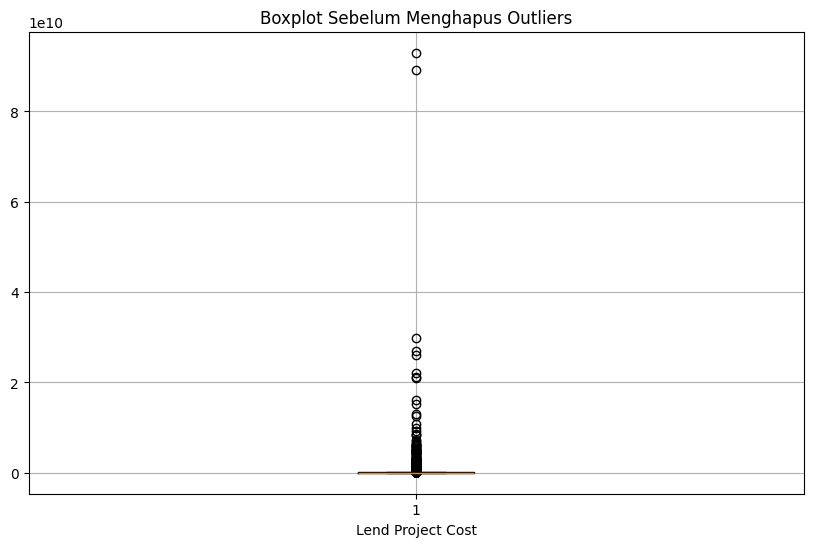

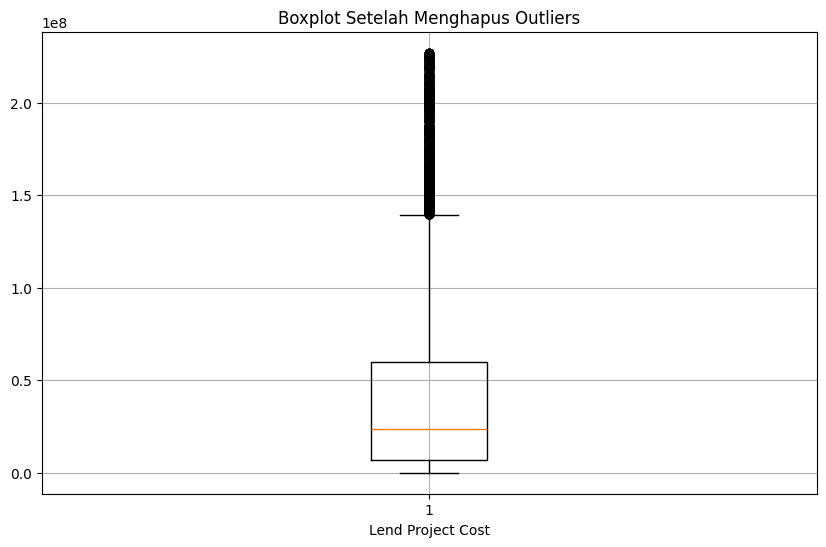

In [18]:
plt.figure(figsize=(10, 6))
plt.boxplot(project_cleaned['lendprojectcost'])
plt.title('Boxplot Sebelum Menghapus Outliers')
plt.xlabel('Lend Project Cost')
plt.grid(True)
plt.show()

Q1 = project_cleaned['lendprojectcost'].quantile(0.25)
Q3 = project_cleaned['lendprojectcost'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

project_no_outliers = project_cleaned[(project_cleaned['lendprojectcost'] >= lower_bound) & (project_cleaned['lendprojectcost'] <= upper_bound)]

plt.figure(figsize=(10, 6))
plt.boxplot(project_no_outliers['lendprojectcost'])
plt.title('Boxplot Setelah Menghapus Outliers')
plt.xlabel('Lend Project Cost')
plt.grid(True)
plt.show()


In [19]:
dummies = pd.get_dummies(project_cleaned['status'])

In [20]:
dummies_project = project_cleaned['regionname'] 
project_dummy = pd.concat([dummies_project, dummies], axis=1)

project_dummy

regionname      0  Active  Closed  Dropped  Pipeline
0                            Other  False    True   False    False     False
1                           Africa  False    True   False    False     False
2                       South Asia  False    True   False    False     False
3                       South Asia  False    True   False    False     False
4                           Africa  False    True   False    False     False
...                            ...    ...     ...     ...      ...       ...
18243  Latin America and Caribbean  False   False    True    False     False
18244      Europe and Central Asia  False   False    True    False     False
18245      Europe and Central Asia  False   False    True    False     False
18246      Europe and Central Asia  False   False    True    False     False
18247      Europe and Central Asia  False   False    True    False     False

[18248 rows x 6 columns]

In [21]:
project_dummy.to_csv('data_dummies/dummies_project_data.csv', index=False)

In [22]:
project_group = project_cleaned.groupby('countryname')['lendprojectcost'].sum().reset_index()
project_group.columns = ['countryname', 'projectcost']

print("Total rows:", project_group.shape[0])
print(project_group)


Total rows: 206
                     countryname   projectcost
0                         Africa  1.354880e+10
1                 American Samoa  2.000000e+05
2               Andean Countries  6.716000e+07
3            Antigua and Barbuda  1.000000e+07
4         Arab Republic of Egypt  4.362445e+10
..                           ...           ...
201  United Republic of Tanzania  2.992717e+10
202           West Bank and Gaza  3.686290e+09
203               Western Africa  9.441430e+09
204              Western Balkans  1.791700e+08
205                        World  8.951459e+10

[206 rows x 2 columns]


In [23]:
project_cleaned.to_csv('data_clean/clean_projects_data.csv', index=False)

## Transform Data

### Cek missing values dari masing masing dataset

In [24]:
def check_missing_data(data, name):
    missing_data = data.isnull().sum()
    print(f"Mengecek missing values {name}\n")
    print(missing_data)

check_missing_data(electricity, "electricity")
check_missing_data(population_csv, "population_csv")
check_missing_data(gdp, "gdp")
check_missing_data(rural, "rural")
check_missing_data(population_json, "population_json")
check_missing_data(population_xml, "population_xml")
check_missing_data(population_data_db, "population_data_db")
check_missing_data(data_world_bank, "data_world_bank")
check_missing_data(mystery, "mystery")

Mengecek missing values electricity

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              264
                 ... 
2014                3
2015                3
2016                3
2017              264
Unnamed: 62       264
Length: 63, dtype: int64
Mengecek missing values population_csv

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                4
                 ... 
2014                2
2015                2
2016                2
2017                2
Unnamed: 62       264
Length: 63, dtype: int64
Mengecek missing values gdp

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              140
                 ... 
2014               17
2015               18
2016               23
2017               30
Unnamed: 62       264
Length: 63, dtype: int64
Mengecek missing values rural

Country Name        0
Country Code        0
Indicator Name    

### Mengatasi missing values

In [25]:
def clean_missing_data(data, name):
    cleaned_data = data.dropna(axis=1, how='all')
    cleaned_data = data.fillna(0)
    print(f"Setelah mengatasi data yang hilang untuk {name}\n")
    print(cleaned_data)
    return cleaned_data  # Mengembalikan dataframe yang sudah dibersihkan

def handle_missing_values(data, name):
    imputer = SimpleImputer(strategy='constant', fill_value=0)
    imputed_data = imputer.fit_transform(data)
    imputed_df = pd.DataFrame(imputed_data, columns=data.columns)
    print(f"Setelah mengatasi data yang hilang untuk {name}\n")
    print(imputed_df)
    return imputed_df  # Mengembalikan dataframe yang sudah diisi nilai yang hilang

# Membersihkan nilai yang hilang
electricity_cleaned = clean_missing_data(electricity, "electricity")
population_cleaned = clean_missing_data(population_csv, "population_csv")
gdp_cleaned = handle_missing_values(gdp, "gdp")
rural_cleaned = handle_missing_values(rural, "rural")
population_json_cleaned = clean_missing_data(population_json, "population_json")
population_xml_cleaned = clean_missing_data(population_xml, "population_xml")
population_data_db_cleaned = clean_missing_data(population_data_db, "population_data_db")
data_world_bank_cleaned = clean_missing_data(data_world_bank, "data_world_bank")
mystery_cleaned = clean_missing_data(mystery, "mystery")

Setelah mengatasi data yang hilang untuk electricity

     Country Name Country Code                           Indicator Name  \
0           Aruba          ABW  Access to electricity (% of population)   
1     Afghanistan          AFG  Access to electricity (% of population)   
2          Angola          AGO  Access to electricity (% of population)   
3         Albania          ALB  Access to electricity (% of population)   
4         Andorra          AND  Access to electricity (% of population)   
..            ...          ...                                      ...   
259        Kosovo          XKX  Access to electricity (% of population)   
260   Yemen, Rep.          YEM  Access to electricity (% of population)   
261  South Africa          ZAF  Access to electricity (% of population)   
262        Zambia          ZMB  Access to electricity (% of population)   
263      Zimbabwe          ZWE  Access to electricity (% of population)   

     Indicator Code  1960  1961  1962  1963  

In [26]:
# Memeriksa kembali missing values
check_missing_data(electricity_cleaned, "electricity")
check_missing_data(population_cleaned, "population_csv")
check_missing_data(gdp_cleaned, "gdp")
check_missing_data(rural_cleaned, "rural")
check_missing_data(population_json_cleaned, "population_json")
check_missing_data(population_xml_cleaned, "population_xml")
check_missing_data(population_data_db_cleaned, "population_data_db")
check_missing_data(data_world_bank_cleaned, "data_world_bank")
check_missing_data(mystery_cleaned, "mystery")

Mengecek missing values electricity

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2014              0
2015              0
2016              0
2017              0
Unnamed: 62       0
Length: 63, dtype: int64
Mengecek missing values population_csv

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2014              0
2015              0
2016              0
2017              0
Unnamed: 62       0
Length: 63, dtype: int64
Mengecek missing values gdp

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2014              0
2015              0
2016              0
2017              0
Unnamed: 62       0
Length: 63, dtype: int64
Mengecek missing values rural

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2014    

### Mengatasi duplikasi data

In [27]:
def remove_duplicates(data, name):
    # Menghapus duplikasi
    data_duplicate = data.drop_duplicates()
    # Menampilkan hasil
    print(f"Setelah menghapus duplikasi untuk {name}\n")
    print(data_duplicate)

remove_duplicates(electricity_cleaned, "electricity")
remove_duplicates(population_cleaned, "population_csv")
remove_duplicates(gdp_cleaned, "gdp")
remove_duplicates(rural_cleaned, "rural")
remove_duplicates(population_json_cleaned, "population_json")
remove_duplicates(population_xml_cleaned, "population_xml")
remove_duplicates(population_data_db_cleaned, "population_data_db")
remove_duplicates(data_world_bank_cleaned, "data_world_bank")
remove_duplicates(mystery_cleaned, "mystery")
remove_duplicates(project_cleaned, "project")

Setelah menghapus duplikasi untuk electricity

     Country Name Country Code                           Indicator Name  \
0           Aruba          ABW  Access to electricity (% of population)   
1     Afghanistan          AFG  Access to electricity (% of population)   
2          Angola          AGO  Access to electricity (% of population)   
3         Albania          ALB  Access to electricity (% of population)   
4         Andorra          AND  Access to electricity (% of population)   
..            ...          ...                                      ...   
259        Kosovo          XKX  Access to electricity (% of population)   
260   Yemen, Rep.          YEM  Access to electricity (% of population)   
261  South Africa          ZAF  Access to electricity (% of population)   
262        Zambia          ZMB  Access to electricity (% of population)   
263      Zimbabwe          ZWE  Access to electricity (% of population)   

     Indicator Code  1960  1961  1962  1963  1964  1

### Feature Engineering

In [28]:
# Membersihkan kolom yang tidak diperlukan dari dataframe electricity
electricity_cleaned = electricity_cleaned.drop(columns=['Indicator Name', 'Indicator Code', 'Unnamed: 62'])

# Menampilkan dataframe electricity_cleaned
print("Electricity Cleaned:")
print(electricity_cleaned)

# Membersihkan kolom yang tidak diperlukan dari dataframe population
population_cleaned = population_cleaned.drop(columns=['Indicator Name', 'Indicator Code', 'Unnamed: 62'])

# Menampilkan dataframe population_cleaned
print("\nPopulation Cleaned:")
print(population_cleaned)

# Membersihkan kolom yang tidak diperlukan dari dataframe gdp
gdp_cleaned = gdp_cleaned.drop(columns=['Indicator Name', 'Indicator Code', 'Unnamed: 62'])

# Menampilkan dataframe gdp_cleaned
print("\nGDP Cleaned:")
print(gdp_cleaned)

# Membersihkan kolom yang tidak diperlukan dari dataframe rural
rural_cleaned = rural_cleaned.drop(columns=['Indicator Name', 'Indicator Code', 'Unnamed: 62'])

# Menampilkan dataframe rural_cleaned
print("\nRural Cleaned:")
print(rural_cleaned)

# Membersihkan kolom yang tidak diperlukan dari dataframe population_json
population_json_cleaned = population_json_cleaned.drop(columns=['Indicator Name', 'Indicator Code'])

# Menampilkan dataframe population_json_cleaned
print("\nPopulation JSON Cleaned:")
print(population_json_cleaned)

# Membersihkan dan merename kolom di dataframe population_xml
population_xml_cleaned.drop(columns=['Indicator Name', 'Indicator Code'], inplace=True)
population_xml_cleaned.rename(columns={'Country_or_Area': 'Country Name', 'Value': 'Population'}, inplace=True)

# Menampilkan dataframe population_xml_cleaned
print("\nPopulation XML Cleaned:")
print(population_xml_cleaned)

# Membersihkan dan merename kolom di dataframe population_data_db
population_data_db_cleaned.drop(columns=['index', 'Indicator_Name', 'Indicator_Code'], inplace=True)
population_data_db_cleaned.rename(columns={'Country_Name': 'Country Name', 'Country_Code': 'Country Code'}, inplace=True)

# Menampilkan dataframe population_data_db_cleaned
print("\nPopulation Data DB Cleaned:")
print(population_data_db_cleaned)

# Membersihkan kolom yang tidak diperlukan dari dataframe mystery
mystery_cleaned = mystery_cleaned.drop(columns=['Indicator Name', 'Indicator Code', 'Unnamed: 0'])

# Menampilkan dataframe mystery_cleaned
print("\nMystery Duplicate:")
print(mystery_cleaned)


Electricity Cleaned:
     Country Name Country Code  1960  1961  1962  1963  1964  1965  1966  \
0           Aruba          ABW   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1     Afghanistan          AFG   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2          Angola          AGO   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3         Albania          ALB   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4         Andorra          AND   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
..            ...          ...   ...   ...   ...   ...   ...   ...   ...   
259        Kosovo          XKX   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
260   Yemen, Rep.          YEM   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
261  South Africa          ZAF   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
262        Zambia          ZMB   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
263      Zimbabwe          ZWE   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

     1967  ...        2008        2009        2010        2011    

In [29]:
# Membentuk ulang dataframe electricity
electricity_cleaned = pd.melt(electricity_cleaned, 
                                      id_vars=['Country Name', 'Country Code'], 
                                      var_name='Year', 
                                      value_name='Electricity')

# Menampilkan dataframe electricity
print("Data Electricity:")
print(electricity_cleaned)

# Membentuk ulang dataframe population
population_cleaned = pd.melt(population_cleaned, 
                               id_vars=['Country Name', 'Country Code'], 
                               var_name='Year', 
                               value_name='Population')

# Menampilkan dataframe population
print("\nPopulation:")
print(population_cleaned)

# Membentuk ulang dataframe gdp
gdp_cleaned = pd.melt(gdp_cleaned, 
                         id_vars=['Country Name', 'Country Code'], 
                         var_name='Year', 
                         value_name='GDP')

# Menampilkan dataframe gdp
print("\nGDP:")
print(gdp_cleaned)

# Membentuk ulang dataframe rural
rural_cleaned = pd.melt(rural_cleaned, 
                           id_vars=['Country Name', 'Country Code'], 
                           var_name='Year', 
                           value_name='Rural')

# Menampilkan dataframe rural
print("\nRural:")
print(rural_cleaned)

# Membentuk ulang dataframe population_json
population_json_cleaned = pd.melt(population_json_cleaned, 
                                     id_vars=['Country Name', 'Country Code'], 
                                     var_name='Year', 
                                     value_name='Population')

# Menampilkan dataframe population_json
print("\nPopulation JSON:")
print(population_json_cleaned)

# Membentuk ulang dataframe population_data_db
population_data_db_cleaned = pd.melt(population_data_db_cleaned, 
                                       id_vars=['Country Name', 'Country Code'], 
                                       var_name='Year', 
                                       value_name='Population')

# Menampilkan dataframe population_data_db
print("\nPopulation Data DB:")
print(population_data_db_cleaned)

mystery_cleaned = pd.melt(mystery_cleaned, 
                               id_vars=['Country Name', 'Country Code'], 
                               var_name='Year', 
                               value_name='Population')

# Menampilkan dataframe Mystery
print("\nMystery:")
mystery_cleaned


Data Electricity:


       Country Name Country Code  Year  Electricity
0             Aruba          ABW  1960          0.0
1       Afghanistan          AFG  1960          0.0
2            Angola          AGO  1960          0.0
3           Albania          ALB  1960          0.0
4           Andorra          AND  1960          0.0
...             ...          ...   ...          ...
15307        Kosovo          XKX  2017          0.0
15308   Yemen, Rep.          YEM  2017          0.0
15309  South Africa          ZAF  2017          0.0
15310        Zambia          ZMB  2017          0.0
15311      Zimbabwe          ZWE  2017          0.0

[15312 rows x 4 columns]

Population:
       Country Name Country Code  Year  Population
0             Aruba          ABW  1960     54211.0
1       Afghanistan          AFG  1960   8996351.0
2            Angola          AGO  1960   5643182.0
3           Albania          ALB  1960   1608800.0
4           Andorra          AND  1960     13411.0
...             ...          .

Country Name Country Code  Year  Population
0             Aruba          ABW  1960     54211.0
1       Afghanistan          AFG  1960   8996351.0
2            Angola          AGO  1960   5643182.0
3           Albania          ALB  1960   1608800.0
4           Andorra          AND  1960     13411.0
...             ...          ...   ...         ...
15307        Kosovo          XKX  2017   1830700.0
15308   Yemen, Rep.          YEM  2017  28250420.0
15309  South Africa          ZAF  2017  56717156.0
15310        Zambia          ZMB  2017  17094130.0
15311      Zimbabwe          ZWE  2017  16529904.0

[15312 rows x 4 columns]

In [30]:
electricity_cleaned.info()
population_cleaned.info()
gdp_cleaned.info()
rural_cleaned.info()
population_json_cleaned.info()
population_xml_cleaned.info()
population_data_db_cleaned.info()
data_world_bank_cleaned.info()
mystery_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15312 entries, 0 to 15311
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  15312 non-null  object 
 1   Country Code  15312 non-null  object 
 2   Year          15312 non-null  object 
 3   Electricity   15312 non-null  float64
dtypes: float64(1), object(3)
memory usage: 478.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15312 entries, 0 to 15311
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  15312 non-null  object 
 1   Country Code  15312 non-null  object 
 2   Year          15312 non-null  object 
 3   Population    15312 non-null  float64
dtypes: float64(1), object(3)
memory usage: 478.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15312 entries, 0 to 15311
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  -----

In [31]:
# Ubah kolom 'Year' menjadi tipe data datetime
electricity_cleaned['Year'] = pd.to_datetime(electricity_cleaned['Year']).dt.year
print("Electricity:")
print(electricity_cleaned.info())

population_cleaned['Year'] = pd.to_datetime(population_cleaned['Year']).dt.year
print("\nPopulation:")
print(population_cleaned.info())

gdp_cleaned['Year'] = pd.to_datetime(gdp_cleaned['Year']).dt.year
gdp_cleaned['Gdp'] = pd.to_numeric(gdp_cleaned['GDP'])
print("\nGDP:")
print(gdp_cleaned.info())

rural_cleaned['Year'] = pd.to_datetime(rural_cleaned['Year']).dt.year
rural_cleaned['Rural'] = pd.to_numeric(rural_cleaned['Rural'])
print("\nRural:")
print(rural_cleaned.info())

population_json_cleaned['Year'] = pd.to_datetime(population_json_cleaned['Year']).dt.year
print("\nPopulation JSON:")
print(population_json_cleaned.info())

population_xml_cleaned['Year'] = pd.to_datetime(population_xml_cleaned['Year']).dt.year
population_xml_cleaned['Population'] = pd.to_numeric(population_xml_cleaned['Population'])
print("\nPopulation XML:")
print(population_xml_cleaned.info())

population_data_db_cleaned['Year'] = pd.to_datetime(population_data_db_cleaned['Year']).dt.year
print("\nPopulation Data DB:")
print(population_data_db_cleaned.info())

data_world_bank_cleaned['Year'] = pd.to_datetime(data_world_bank_cleaned['Year']).dt.year
print("\nData World Bank:")
print(data_world_bank_cleaned.info())

mystery_cleaned['Year'] = pd.to_datetime(mystery_cleaned['Year']).dt.year
print("\nMystery:")
print(mystery_cleaned.info())

Electricity:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15312 entries, 0 to 15311
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  15312 non-null  object 
 1   Country Code  15312 non-null  object 
 2   Year          15312 non-null  int32  
 3   Electricity   15312 non-null  float64
dtypes: float64(1), int32(1), object(2)
memory usage: 418.8+ KB
None

Population:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15312 entries, 0 to 15311
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  15312 non-null  object 
 1   Country Code  15312 non-null  object 
 2   Year          15312 non-null  int32  
 3   Population    15312 non-null  float64
dtypes: float64(1), int32(1), object(2)
memory usage: 418.8+ KB
None



GDP:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15312 entries, 0 to 15311
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  15312 non-null  object 
 1   Country Code  15312 non-null  object 
 2   Year          15312 non-null  int32  
 3   GDP           15312 non-null  object 
 4   Gdp           15312 non-null  float64
dtypes: float64(1), int32(1), object(3)
memory usage: 538.4+ KB
None

Rural:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15312 entries, 0 to 15311
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  15312 non-null  object 
 1   Country Code  15312 non-null  object 
 2   Year          15312 non-null  int32  
 3   Rural         15312 non-null  float64
dtypes: float64(1), int32(1), object(2)
memory usage: 418.8+ KB
None

Population JSON:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15312

In [32]:
electricity_cleaned.to_csv('data_clean/clean_electricity.csv', index=False)
population_cleaned.to_csv('data_clean/clean_population.csv', index=False)
gdp_cleaned.to_csv('data_clean/clean_gdp.csv', index=False)
rural_cleaned.to_csv('data_clean/clean_rural.csv', index=False)
population_json_cleaned.to_csv('data_clean/clean_population_json.csv', index=False)
population_xml_cleaned.to_csv('data_clean/clean_population_xml.csv', index=False)
population_data_db_cleaned.to_csv('data_clean/clean_population_data_db.csv', index=False)
data_world_bank_cleaned.to_csv('data_clean/clean_data_world_bank.csv', index=False)
mystery_cleaned.to_csv('data_clean/clean_mystery.csv', index=False)

## Merge dataset population(csv, json, xml, db, mystery, api)

In [33]:
population_cleaned.update(population_json_cleaned[population_json_cleaned['Country Name'].isin(population_cleaned['Country Name'])])
population_cleaned.update(population_xml_cleaned[population_xml_cleaned['Country Name'].isin(population_cleaned['Country Name'])])
population_cleaned.update(population_data_db_cleaned[population_data_db_cleaned['Country Name'].isin(population_cleaned['Country Name'])])
population_cleaned.update(mystery_cleaned[mystery_cleaned['Country Name'].isin(population_cleaned['Country Name'])])
merged = population_cleaned.merge(data_world_bank_cleaned, on=['Country Name', 'Country Code', 'Year', 'Population'])
merged.head()

C:\Users\abdan\AppData\Local\Temp\ipykernel_11948\2473251667.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1960 1961 1962 ... 2015 2016 2017]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  population_cleaned.update(population_xml_cleaned[population_xml_cleaned['Country Name'].isin(population_cleaned['Country Name'])])


Country Name Country Code  Year  Population Indicator Code  \
0      Albania          ALB  1960   1608800.0    SP.POP.TOTL   
1    Australia          AUS  1960  10276477.0    SP.POP.TOTL   
2      Austria          AUT  1960   7047539.0    SP.POP.TOTL   
3      Belgium          BEL  1960   9153489.0    SP.POP.TOTL   
4     Bulgaria          BGR  1960   7867374.0    SP.POP.TOTL   

      Indicator Name  
0  Population, total  
1  Population, total  
2  Population, total  
3  Population, total  
4  Population, total

In [34]:
merged = pd.concat([population_cleaned, data_world_bank_cleaned], ignore_index=True)
merged

Country Name Country Code  Year  Population Indicator Code  \
0            Aruba          ABW  1960     54211.0            NaN   
1      Afghanistan          AFG  1960   8996351.0            NaN   
2           Angola          AGO  1960   5643182.0            NaN   
3          Albania          ALB  1960   1608800.0            NaN   
4          Andorra          AND  1960     13411.0            NaN   
...            ...          ...   ...         ...            ...   
32331     Zimbabwe          ZWE  1964   4310332.0    SP.POP.TOTL   
32332     Zimbabwe          ZWE  1963   4177931.0    SP.POP.TOTL   
32333     Zimbabwe          ZWE  1962   4049778.0    SP.POP.TOTL   
32334     Zimbabwe          ZWE  1961   3925952.0    SP.POP.TOTL   
32335     Zimbabwe          ZWE  1960   3806310.0    SP.POP.TOTL   

          Indicator Name  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
...                  ...  
32331  Population, total  
32332  Population, total  
32333  Population, total  
32334  Population, total  
32335  Population, total  

[32336 rows x 6 columns]

In [35]:
merged.drop_duplicates(subset=['Country Name', 'Country Code', 'Year'], inplace=True)
merged

Country Name Country Code  Year  Population Indicator Code  \
0            Aruba          ABW  1960     54211.0            NaN   
1      Afghanistan          AFG  1960   8996351.0            NaN   
2           Angola          AGO  1960   5643182.0            NaN   
3          Albania          ALB  1960   1608800.0            NaN   
4          Andorra          AND  1960     13411.0            NaN   
...            ...          ...   ...         ...            ...   
32273     Zimbabwe          ZWE  2022  16320537.0    SP.POP.TOTL   
32274     Zimbabwe          ZWE  2021  15993524.0    SP.POP.TOTL   
32275     Zimbabwe          ZWE  2020  15669666.0    SP.POP.TOTL   
32276     Zimbabwe          ZWE  2019  15354608.0    SP.POP.TOTL   
32277     Zimbabwe          ZWE  2018  15052184.0    SP.POP.TOTL   

          Indicator Name  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
...                  ...  
32273  Population, total  
32274  Population, total  
32275  Population, total  
32276  Population, total  
32277  Population, total  

[17604 rows x 6 columns]

In [36]:
merged.duplicated().sum()

0

In [37]:
merged.drop(columns=['Indicator Code', 'Indicator Name'], inplace=True)

In [38]:
merged.reset_index(drop=True)

Country Name Country Code  Year  Population
0            Aruba          ABW  1960     54211.0
1      Afghanistan          AFG  1960   8996351.0
2           Angola          AGO  1960   5643182.0
3          Albania          ALB  1960   1608800.0
4          Andorra          AND  1960     13411.0
...            ...          ...   ...         ...
17599     Zimbabwe          ZWE  2022  16320537.0
17600     Zimbabwe          ZWE  2021  15993524.0
17601     Zimbabwe          ZWE  2020  15669666.0
17602     Zimbabwe          ZWE  2019  15354608.0
17603     Zimbabwe          ZWE  2018  15052184.0

[17604 rows x 4 columns]

In [39]:
merged.to_csv('data_combined/data_combined_population.csv', index=False)

### Membuat GDP Percapita

In [40]:
merge = pd.merge(merged, gdp_cleaned, on =['Country Name', 'Country Code', 'Year'])
merge

Country Name Country Code  Year  Population                  GDP  \
0             Aruba          ABW  1960     54211.0                    0   
1       Afghanistan          AFG  1960   8996351.0     537777811.111111   
2            Angola          AGO  1960   5643182.0                    0   
3           Albania          ALB  1960   1608800.0                    0   
4           Andorra          AND  1960     13411.0                    0   
...             ...          ...   ...         ...                  ...   
15249        Kosovo          XKX  2017   1830700.0     7128690556.68244   
15250   Yemen, Rep.          YEM  2017  28250420.0                    0   
15251  South Africa          ZAF  2017  56717156.0  349419343614.088989   
15252        Zambia          ZMB  2017  17094130.0   25808666421.555801   
15253      Zimbabwe          ZWE  2017  16529904.0        17845821400.0   

                Gdp  
0      0.000000e+00  
1      5.377778e+08  
2      0.000000e+00  
3      0.000000e+00  
4      0.000000e+00  
...             ...  
15249  7.128691e+09  
15250  0.000000e+00  
15251  3.494193e+11  
15252  2.580867e+10  
15253  1.784582e+10  

[15254 rows x 6 columns]

In [41]:
merge = merge.drop(columns='Gdp')

In [42]:
merge['Population'] = merge['Population'].replace(0, np.nan)

# Calculate GDP per capita
merge['gdp percapita'] = merge['GDP'] / merge['Population']

print(merge)

       Country Name Country Code  Year  Population                  GDP  \
0             Aruba          ABW  1960     54211.0                    0   
1       Afghanistan          AFG  1960   8996351.0     537777811.111111   
2            Angola          AGO  1960   5643182.0                    0   
3           Albania          ALB  1960   1608800.0                    0   
4           Andorra          AND  1960     13411.0                    0   
...             ...          ...   ...         ...                  ...   
15249        Kosovo          XKX  2017   1830700.0     7128690556.68244   
15250   Yemen, Rep.          YEM  2017  28250420.0                    0   
15251  South Africa          ZAF  2017  56717156.0  349419343614.088989   
15252        Zambia          ZMB  2017  17094130.0   25808666421.555801   
15253      Zimbabwe          ZWE  2017  16529904.0        17845821400.0   

      gdp percapita  
0               0.0  
1         59.777327  
2               0.0  
3          

In [43]:
merged_data = pd.merge(rural_cleaned, electricity_cleaned, on=["Country Name", "Country Code", 'Year'])
merged_data

Country Name Country Code  Year   Rural  Electricity
0             Aruba          ABW  1960  49.224          0.0
1       Afghanistan          AFG  1960  91.779          0.0
2            Angola          AGO  1960  89.565          0.0
3           Albania          ALB  1960  69.295          0.0
4           Andorra          AND  1960  41.550          0.0
...             ...          ...   ...     ...          ...
15307        Kosovo          XKX  2017   0.000          0.0
15308   Yemen, Rep.          YEM  2017  64.231          0.0
15309  South Africa          ZAF  2017  34.218          0.0
15310        Zambia          ZMB  2017  58.160          0.0
15311      Zimbabwe          ZWE  2017  67.793          0.0

[15312 rows x 5 columns]

In [44]:
print("Jumlah duplikasi pada merged_data:", merged_data.duplicated().sum())

# Memeriksa nilai yang hilang pada data gabungan
print("Jumlah nilai yang hilang pada merged_data:")
print(merged_data.isnull().sum())

Jumlah duplikasi pada merged_data: 0
Jumlah nilai yang hilang pada merged_data:
Country Name    0
Country Code    0
Year            0
Rural           0
Electricity     0
dtype: int64


In [45]:
mean_electricity = merged_data['Electricity'].mean()
merged_data['Electricity'] = merged_data['Electricity'].fillna(mean_electricity)


# Memeriksa kembali apakah masih ada nilai yang hilang
print("Jumlah nilai yang hilang pada merged_data setelah diisi:")
print(merged_data.isnull().sum())

Jumlah nilai yang hilang pada merged_data setelah diisi:
Country Name    0
Country Code    0
Year            0
Rural           0
Electricity     0
dtype: int64


In [46]:
data_merge = pd.merge(merge, merged_data, on=["Country Name", "Country Code", "Year"])

data_merge

Country Name Country Code  Year  Population                  GDP  \
0             Aruba          ABW  1960     54211.0                    0   
1       Afghanistan          AFG  1960   8996351.0     537777811.111111   
2            Angola          AGO  1960   5643182.0                    0   
3           Albania          ALB  1960   1608800.0                    0   
4           Andorra          AND  1960     13411.0                    0   
...             ...          ...   ...         ...                  ...   
15249        Kosovo          XKX  2017   1830700.0     7128690556.68244   
15250   Yemen, Rep.          YEM  2017  28250420.0                    0   
15251  South Africa          ZAF  2017  56717156.0  349419343614.088989   
15252        Zambia          ZMB  2017  17094130.0   25808666421.555801   
15253      Zimbabwe          ZWE  2017  16529904.0        17845821400.0   

      gdp percapita   Rural  Electricity  
0               0.0  49.224          0.0  
1         59.777327  91.779          0.0  
2               0.0  89.565          0.0  
3               0.0  69.295          0.0  
4               0.0  41.550          0.0  
...             ...     ...          ...  
15249   3893.969824   0.000          0.0  
15250           0.0  64.231          0.0  
15251   6160.734569  34.218          0.0  
15252   1509.797013  58.160          0.0  
15253   1079.608291  67.793          0.0  

[15254 rows x 8 columns]

In [47]:
electricity_counts = data_merge['Electricity'].value_counts()
print(electricity_counts)

Electricity
0.000000      8324
100.000000    2048
0.010000        68
99.000000       13
99.800000       12
              ... 
85.057510        1
98.157394        1
99.512566        1
90.606967        1
38.145138        1
Name: count, Length: 4576, dtype: int64


In [48]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15254 entries, 0 to 15253
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   15254 non-null  object 
 1   Country Code   15254 non-null  object 
 2   Year           15254 non-null  int64  
 3   Population     15089 non-null  float64
 4   GDP            15254 non-null  object 
 5   gdp percapita  15089 non-null  object 
 6   Rural          15254 non-null  float64
 7   Electricity    15254 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 953.5+ KB


In [49]:
data_merge

Country Name Country Code  Year  Population                  GDP  \
0             Aruba          ABW  1960     54211.0                    0   
1       Afghanistan          AFG  1960   8996351.0     537777811.111111   
2            Angola          AGO  1960   5643182.0                    0   
3           Albania          ALB  1960   1608800.0                    0   
4           Andorra          AND  1960     13411.0                    0   
...             ...          ...   ...         ...                  ...   
15249        Kosovo          XKX  2017   1830700.0     7128690556.68244   
15250   Yemen, Rep.          YEM  2017  28250420.0                    0   
15251  South Africa          ZAF  2017  56717156.0  349419343614.088989   
15252        Zambia          ZMB  2017  17094130.0   25808666421.555801   
15253      Zimbabwe          ZWE  2017  16529904.0        17845821400.0   

      gdp percapita   Rural  Electricity  
0               0.0  49.224          0.0  
1         59.777327  91.779          0.0  
2               0.0  89.565          0.0  
3               0.0  69.295          0.0  
4               0.0  41.550          0.0  
...             ...     ...          ...  
15249   3893.969824   0.000          0.0  
15250           0.0  64.231          0.0  
15251   6160.734569  34.218          0.0  
15252   1509.797013  58.160          0.0  
15253   1079.608291  67.793          0.0  

[15254 rows x 8 columns]

In [50]:
data_cleaned = data_merge.dropna()
data_cleaned

Country Name Country Code  Year  Population                  GDP  \
0             Aruba          ABW  1960     54211.0                    0   
1       Afghanistan          AFG  1960   8996351.0     537777811.111111   
2            Angola          AGO  1960   5643182.0                    0   
3           Albania          ALB  1960   1608800.0                    0   
4           Andorra          AND  1960     13411.0                    0   
...             ...          ...   ...         ...                  ...   
15249        Kosovo          XKX  2017   1830700.0     7128690556.68244   
15250   Yemen, Rep.          YEM  2017  28250420.0                    0   
15251  South Africa          ZAF  2017  56717156.0  349419343614.088989   
15252        Zambia          ZMB  2017  17094130.0   25808666421.555801   
15253      Zimbabwe          ZWE  2017  16529904.0        17845821400.0   

      gdp percapita   Rural  Electricity  
0               0.0  49.224          0.0  
1         59.777327  91.779          0.0  
2               0.0  89.565          0.0  
3               0.0  69.295          0.0  
4               0.0  41.550          0.0  
...             ...     ...          ...  
15249   3893.969824   0.000          0.0  
15250           0.0  64.231          0.0  
15251   6160.734569  34.218          0.0  
15252   1509.797013  58.160          0.0  
15253   1079.608291  67.793          0.0  

[15089 rows x 8 columns]

In [51]:
data_cleaned.to_csv('data_combined/data_merge.csv', index=False)

## LOAD

In [52]:
short_country_names = []

# Iterasi melalui setiap baris dalam DataFrame project
for idx, row in project_cleaned.iterrows():
    found_short_country = None

    # Iterasi melalui setiap nama negara pendek dalam DataFrame rural_duplicate
    for country_short in rural_cleaned['Country Name']:
        # Mencocokkan nama negara dalam project dengan nama negara pendek dalam rural_duplicate
        if re.search(r'\b{}\b'.format(re.escape(country_short)), row['countryname']):
            found_short_country = country_short
            break

    # Menyimpan nama negara pendek yang cocok ke dalam list short_country_names
    short_country_names.append(found_short_country)

# Menampilkan jumlah nama negara pendek yang ditemukan
print(len(short_country_names))
# Menampilkan daftar nama negara pendek yang ditemukan
print(short_country_names)

# Menambahkan kolom baru 'countryname_short' ke DataFrame project
project_cleaned['countryname_short'] = short_country_names

18248
['World', None, 'Bangladesh', 'Afghanistan', 'Nigeria', 'Tunisia', 'Nigeria', 'Nigeria', 'Nigeria', None, None, 'Nigeria', 'Nepal', 'Nigeria', 'Kyrgyz Republic', 'Jordan', 'Myanmar', None, 'Tanzania', 'Ethiopia', 'Burkina Faso', 'Uzbekistan', 'Romania', 'Ethiopia', 'Ghana', 'Ecuador', 'Vietnam', 'China', 'Senegal', 'Grenada', 'Guyana', None, 'Indonesia', 'Kenya', 'Indonesia', 'Cambodia', 'Angola', 'India', 'China', None, 'Zambia', 'Kenya', None, 'Panama', 'Tunisia', 'Tonga', 'Pakistan', 'Pakistan', 'Bangladesh', 'Niger', 'Uganda', 'Madagascar', 'Bolivia', 'Afghanistan', 'China', 'Indonesia', None, 'Morocco', None, 'Djibouti', None, 'Maldives', 'Senegal', 'Indonesia', 'China', 'China', 'China', 'Central African Republic', 'India', None, 'Cabo Verde', "Cote d'Ivoire", 'Montenegro', 'Kyrgyz Republic', 'West Bank and Gaza', 'West Bank and Gaza', 'Ethiopia', 'Ghana', 'Haiti', 'Senegal', 'Guinea', 'Haiti', 'World', 'Samoa', 'Indonesia', None, None, 'Marshall Islands', 'Angola', 'Tunisi

In [53]:
# Memilih kolom 'Country Name' dan 'Year' dari DataFrame data_final
project_data = data_cleaned[['Country Name', 'Year']]

# Menggabungkan DataFrame project_duplicate dengan DataFrame project_data
# Menggunakan kolom 'countryname_short' dari project dan kolom 'boardapprovaldate' dari project_data
# Menggunakan metode right join untuk mempertahankan semua baris dari project_data
project_merge = project_cleaned.merge(
    project_data,
    how='right',
    left_on=['countryname_short', 'boardapprovaldate'],
    right_on=['Country Name', 'Year']
)[['Country Name', 'boardapprovaldate', 'lendprojectcost']]

# Mengurutkan DataFrame hasil penggabungan berdasarkan 'Country Name' dan 'boardapprovaldate'
project_merge = project_merge.sort_values(by=['Country Name', 'boardapprovaldate'])

project_merge

Country Name  boardapprovaldate  lendprojectcost
1095   Afghanistan             1964.0        3500000.0
2496   Afghanistan             1969.0        5000000.0
2798   Afghanistan             1970.0        5000000.0
3117   Afghanistan             1971.0        5000000.0
3747   Afghanistan             1973.0       11500000.0
...            ...                ...              ...
17601     Zimbabwe                NaN              NaN
18158     Zimbabwe                NaN              NaN
18765     Zimbabwe                NaN              NaN
19387     Zimbabwe                NaN              NaN
21903     Zimbabwe                NaN              NaN

[24779 rows x 3 columns]

In [54]:
# Mengisi nilai-nilai yang hilang (NaN) dengan 0
project_merge = project_merge.fillna(0)

# Mengubah tipe data kolom 'boardapprovaldate' menjadi integer
project_merge['boardapprovaldate'] = project_merge['boardapprovaldate'].astype(int)

project_merge

Country Name  boardapprovaldate  lendprojectcost
1095   Afghanistan               1964        3500000.0
2496   Afghanistan               1969        5000000.0
2798   Afghanistan               1970        5000000.0
3117   Afghanistan               1971        5000000.0
3747   Afghanistan               1973       11500000.0
...            ...                ...              ...
17601     Zimbabwe                  0              0.0
18158     Zimbabwe                  0              0.0
18765     Zimbabwe                  0              0.0
19387     Zimbabwe                  0              0.0
21903     Zimbabwe                  0              0.0

[24779 rows x 3 columns]

In [55]:
# Memilih baris dengan boardapprovaldate dalam rentang tahun 1960-2023
project_merge = project_merge.loc[(project_merge['boardapprovaldate'] >= 1960) & (project_merge['boardapprovaldate'] <= 2023)]

# Mengatur ulang indeks baris
project_merge.reset_index(drop=True, inplace=True)
project_merge

Country Name  boardapprovaldate  lendprojectcost
0      Afghanistan               1964        3500000.0
1      Afghanistan               1969        5000000.0
2      Afghanistan               1970        5000000.0
3      Afghanistan               1971        5000000.0
4      Afghanistan               1973       11500000.0
...            ...                ...              ...
13639     Zimbabwe               2015        2000000.0
13640     Zimbabwe               2016        1900000.0
13641     Zimbabwe               2016       20800000.0
13642     Zimbabwe               2016       20000000.0
13643     Zimbabwe               2017       10000000.0

[13644 rows x 3 columns]

In [56]:
# Melakukan penggabungan (merge) antara DataFrame project_merge dengan DataFrame data_final
# Berdasarkan kolom 'Country Name' dan 'boardapprovaldate' untuk project_merge
# Serta 'Country Name' dan 'Year' untuk data_final
# Hanya memilih kolom yang diinginkan untuk dimasukkan ke dalam DataFrame hasil merge, yaitu:
# 'Country Name', 'Country Code', 'Year', 'gdp', 'Population', 'gdp percapita', 'Rural', 'Electricity', dan 'lendprojectcost'
load = project_merge.merge(
    data_cleaned,
    how='right',
    left_on=['Country Name', 'boardapprovaldate'],
    right_on=['Country Name', 'Year'])[['Country Name', 'Country Code', 'Year', 'GDP', 'Population', 'gdp percapita',
                       'Rural', 'Electricity', 'lendprojectcost']]

load

Country Name Country Code  Year                 GDP  Population  \
0            Aruba          ABW  1960                   0     54211.0   
1      Afghanistan          AFG  1960    537777811.111111   8996351.0   
2           Angola          AGO  1960                   0   5643182.0   
3          Albania          ALB  1960                   0   1608800.0   
4          Andorra          AND  1960                   0     13411.0   
...            ...          ...   ...                 ...         ...   
24774       Zambia          ZMB  2017  25808666421.555801  17094130.0   
24775       Zambia          ZMB  2017  25808666421.555801  17094130.0   
24776       Zambia          ZMB  2017  25808666421.555801  17094130.0   
24777       Zambia          ZMB  2017  25808666421.555801  17094130.0   
24778     Zimbabwe          ZWE  2017       17845821400.0  16529904.0   

      gdp percapita   Rural  Electricity  lendprojectcost  
0               0.0  49.224          0.0              NaN  
1         59.777327  91.779          0.0              NaN  
2               0.0  89.565          0.0              NaN  
3               0.0  69.295          0.0              NaN  
4               0.0  41.550          0.0              NaN  
...             ...     ...          ...              ...  
24774   1509.797013  58.160          0.0              0.0  
24775   1509.797013  58.160          0.0      200000000.0  
24776   1509.797013  58.160          0.0       32800000.0  
24777   1509.797013  58.160          0.0        3500000.0  
24778   1079.608291  67.793          0.0       10000000.0  

[24779 rows x 9 columns]

In [57]:
# Mengelompokkan data berdasarkan kolom-kolom yang ingin dijadikan acuan
load = load.groupby(['Country Name', 'Country Code', 'Year', 'Population', 'GDP',
                             'gdp percapita', 'Rural', 'Electricity']
                            )['lendprojectcost'].sum().reset_index()

# Menghapus baris yang duplikat, hanya menyisakan satu baris untuk setiap kelompok
load.drop_duplicates(subset=['Country Name', 'Country Code', 'Year'], keep='first', inplace=True)

load

Country Name Country Code  Year  Population           GDP  \
0      Afghanistan          AFG  1960   8996351.0  5.377778e+08   
1      Afghanistan          AFG  1961   9166764.0  5.488889e+08   
2      Afghanistan          AFG  1962   9345868.0  5.466667e+08   
3      Afghanistan          AFG  1963   9533954.0  7.511112e+08   
4      Afghanistan          AFG  1964   9731361.0  8.000000e+08   
...            ...          ...   ...         ...           ...   
15084     Zimbabwe          ZWE  2013  15054506.0  1.545177e+10   
15085     Zimbabwe          ZWE  2014  15411675.0  1.589105e+10   
15086     Zimbabwe          ZWE  2015  15777451.0  1.630467e+10   
15087     Zimbabwe          ZWE  2016  16150362.0  1.661996e+10   
15088     Zimbabwe          ZWE  2017  16529904.0  1.784582e+10   

       gdp percapita   Rural  Electricity  lendprojectcost  
0          59.777327  91.779     0.000000              0.0  
1          59.878153  91.492     0.000000              0.0  
2          58.492874  91.195     0.000000              0.0  
3          78.782758  90.890     0.000000              0.0  
4          82.208444  90.574     0.000000        3500000.0  
...              ...     ...          ...              ...  
15084    1026.388292  67.346    37.076813       21000000.0  
15085    1031.104614  67.499    32.300000       31200000.0  
15086    1033.415841  67.624    33.700000       17000000.0  
15087    1029.076649  67.723    38.145138       42700000.0  
15088    1079.608291  67.793     0.000000       10000000.0  

[15089 rows x 9 columns]

In [58]:
load.to_csv('data_combined/data_final.csv', index=False)

## LOAD TO FIREBASE

In [59]:
cred = credentials.Certificate(r"C:\Users\abdan\Documents\GitHub\DE_Mini-Project\mini-projects.json")
firebase_admin.initialize_app(cred, {"storageBucket": "mini-project-f9e27.appspot.com"})
bucket = storage.bucket()

# Nama blob dan path lokal ke file CSV
blob_name = 'data_final.csv'
local_file_path = "data_combined/data_final.csv"

try:
    # Mengunggah file ke Firebase Storage
    blob = bucket.blob(blob_name)
    blob.upload_from_filename(local_file_path)
    print("Data berhasil diunggah ke Firebase Storage.")
except Exception as e:
    print("Terjadi kesalahan saat mengunggah data:", str(e))

Data berhasil diunggah ke Firebase Storage.


## Outliers and Scalling Feature

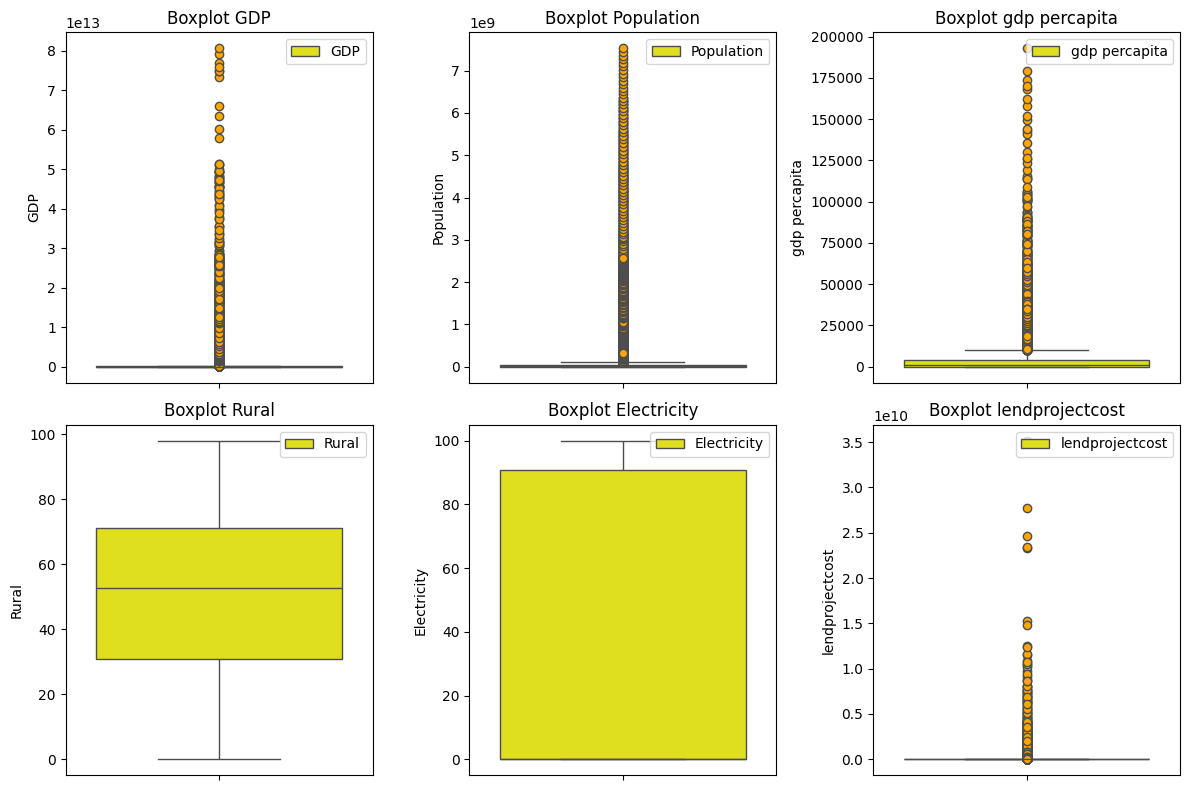

In [60]:
columns = ['GDP', 'Population', 'gdp percapita', 'Rural', 'Electricity', 'lendprojectcost']

plt.figure(figsize=(12, 8))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=load, y=column, color='yellow', flierprops=dict(marker='o', markerfacecolor='orange'))
    plt.title(f'Boxplot {column}')
    plt.xticks(rotation=45)
    plt.legend([column], loc='upper right')  

plt.tight_layout()
plt.show()


### Scalling Feature

In [61]:
scaler = MinMaxScaler()

# Mengambil kolom 
load = load.copy()

features_to_scale = ['Population', 'GDP', 'gdp percapita', 'Rural', 'Electricity', 'lendprojectcost']

load[features_to_scale] = scaler.fit_transform(load[features_to_scale])

load.head()

Country Name Country Code  Year  Population       GDP  gdp percapita  \
0  Afghanistan          AFG  1960    0.001194  0.000007       0.000310   
1  Afghanistan          AFG  1961    0.001217  0.000007       0.000310   
2  Afghanistan          AFG  1962    0.001241  0.000007       0.000303   
3  Afghanistan          AFG  1963    0.001266  0.000009       0.000408   
4  Afghanistan          AFG  1964    0.001292  0.000010       0.000426   

      Rural  Electricity  lendprojectcost  
0  0.937257          0.0           0.0000  
1  0.934326          0.0           0.0000  
2  0.931293          0.0           0.0000  
3  0.928178          0.0           0.0000  
4  0.924951          0.0           0.0001

## Visualisasi

In [139]:
data_load = pd.read_csv("data_combined/data_final.csv")

# Tampilkan lima baris pertama dari dataset
print(data_load.head())

  Country Name Country Code  Year  Population           GDP  gdp percapita  \
0  Afghanistan          AFG  1960   8996351.0  5.377778e+08      59.777327   
1  Afghanistan          AFG  1961   9166764.0  5.488889e+08      59.878153   
2  Afghanistan          AFG  1962   9345868.0  5.466667e+08      58.492874   
3  Afghanistan          AFG  1963   9533954.0  7.511112e+08      78.782758   
4  Afghanistan          AFG  1964   9731361.0  8.000000e+08      82.208444   

    Rural  Electricity  lendprojectcost  
0  91.779          0.0              0.0  
1  91.492          0.0              0.0  
2  91.195          0.0              0.0  
3  90.890          0.0              0.0  
4  90.574          0.0        3500000.0  


In [140]:
import dotenv
from openai import OpenAI

dotenv.load_dotenv()

ai_api = os.getenv("NAGA_AI_KEY")
client = OpenAI(
    api_key= ai_api,
    base_url='https://api.naga.ac/v1'
    )

def generate(prompt, model="gpt-3.5-turbo"):
    response = client.chat.completions.create(
        model=model,
        messages=[
            {
                "role": "user",
                "content": prompt,
            },
        ],
    )
    return response.choices[0].message.content

ai = pd.read_csv("data_combined/data_final.csv")

In [141]:
prompt = ("saya memiliki dataset sebagai berikut: {ai}"
           "dataset tersebut memiliki kolom Country Name, Country Code, Year, GDP, Population, gdp percapita,"
           "Rural, Electricity, dan lendprojectcost. Analisis apa yang cocok untuk dataset ini?"
            "statistik deskriptif, analisis korelasi, analisis distribusi, analisis tren, dan analisis perbandingan"
            "pada setiap kolom tersebut, berikan analisis yang terbaik.")

response = generate(prompt)
print(response)

Berikut adalah analisis yang cocok untuk setiap kolom dalam dataset:

1. Country Name & Country Code:
   - Analisis Perbandingan: Anda dapat melakukan perbandingan antar negara menggunakan kolom ini untuk melihat perbedaan karakteristik ekonomi dan demografi antar negara.

2. Year:
   - Analisis Tren: Anda dapat melakukan analisis tren untuk melihat bagaimana GDP, populasi, gdp per capita, dan lainnya berkembang dari tahun ke tahun.

3. GDP, Population, GDP per Capita, Rural, Electricity, Lendprojectcost:
   - Statistik Deskriptif: Anda dapat menggunakan statistik deskriptif seperti mean, median, dan standard deviation untuk memahami distribusi data dan melihat nilai rata-rata dari masing-masing kolom.
   - Analisis Korelasi: Anda dapat melihat hubungan antara GDP, populasi, gdp per capita, dan lainnya dengan melihat koefisien korelasi antar kolom. Ini dapat membantu Anda menentukan apakah ada hubungan positif atau negatif antara variabel-variabel tersebut.

Dengan melakukan analisis d

### Analisis deskriptif

In [142]:
data = pd.read_csv('data_combined/data_final.csv')

# Memilih kolom-kolom yang akan dianalisis
columns = ['GDP', 'Population', 'gdp percapita', 'Rural', 'Electricity', 'lendprojectcost']

# Analisis statistik deskriptif untuk kolom-kolom yang dipilih
deskriptif = data[columns].describe()

# Menampilkan hasil analisis deskriptif
print(deskriptif)

                GDP    Population  gdp percapita         Rural   Electricity  \
count  1.508900e+04  1.508900e+04   15089.000000  15089.000000  15089.000000   
mean   8.058409e+11  2.067508e+08    5591.419597     50.572622     34.483475   
std    4.148582e+12  6.804964e+08   12970.231077     25.181837     43.455483   
min    0.000000e+00  4.279000e+03       0.000000      0.000000      0.000000   
25%    7.834356e+07  9.065070e+05     103.424469     30.936000      0.000000   
50%    4.374131e+09  6.281738e+06     792.025970     52.608000      0.000000   
75%    7.854026e+10  4.292190e+07    4130.932580     71.151433     90.757362   
max    8.068379e+13  7.530360e+09  192989.189527     97.923000    100.000000   

       lendprojectcost  
count     1.508900e+04  
mean      1.067048e+08  
std       7.604435e+08  
min       0.000000e+00  
25%       0.000000e+00  
50%       0.000000e+00  
75%       3.000000e+06  
max       3.515866e+10  


    GDP :
    Jumlah data yang tidak hilang (count): 15089
    Rata-rata GDP: $8.058409e+11 (sekitar $805.84 miliar)
    Median GDP: $4.374131e+09 (sekitar $4.37 miliar)
        
        Kuartil:
        kuartil pertama (Q1): $7.834356e+07 (sekitar $78.34 juta)
        Kuartil kedua (Q2, median): $4.374131e+09 (sekitar $4.37 miliar)
        Kuartil ketiga (Q3): $7.854026e+10 (sekitar $78.54 miliar)


    Population:
    Jumlah data yang tidak hilang (count): 15089
    Rata-rata populasi: 2.067508e+08 (sekitar 206,750,800 orang)
    Median populasi: 6.281738e+06 (sekitar 6,281,738 orang)
    
        Kuartil:
        Kuartil pertama (Q1): 9.065070e+05 (sekitar 906,507 orang)
        Kuartil kedua (Q2, median): 6.281738e+06 (sekitar 6,281,738 orang)
        Kuartil ketiga (Q3): 4.292190e+07 (sekitar 42,921,900 orang)


    GDP percapita:
    Jumlah data yang tidak hilang (count): 15089
    Rata-rata GDP per capita: $5591.419597 (sekitar $5591.42 per orang)
    Median GDP per capita: $792.025970 (sekitar $792.03 per orang)

        Kuartil:
        Kuartil pertama (Q1): $103.424469 (sekitar $103.42 per orang)
        Kuartil kedua (Q2, median): $792.025970 (sekitar $792.03 per orang)
        Kuartil ketiga (Q3): $4130.932580 (sekitar $4130.93 per orang)


    Rural:
    Jumlah data yang tidak hilang (count): 15089
    Rata-rata proporsi penduduk pedesaan: 50.572622% (sekitar 50.57%)
    Median proporsi penduduk pedesaan: 52.608000% (sekitar 52.61%)

        Kuartil:
        Kuartil pertama (Q1): 30.936000% (sekitar 30.94%)
        Kuartil kedua (Q2, median): 52.608000% (sekitar 52.61%)
        Kuartil ketiga (Q3): 71.151433% (sekitar 71.15%)


    Electricity:
    Jumlah data yang tidak hilang (count): 15089
    Rata-rata akses listrik: 34.483475% (sekitar 34.48%)
    Median akses listrik: 0.000000% (sekitar 0%)

        Kuartil:
        Kuartil pertama (Q1): 0.000000% (sekitar 0%)
        Kuartil kedua (Q2, median): 0.000000% (sekitar 0%)
        Kuartil ketiga (Q3): 90.757362% (sekitar 90.76%)


    Lendprojectcost:
    Jumlah data yang tidak hilang (count): 15089
    Rata-rata biaya proyek pinjaman: $1.067048e+08 (sekitar $106.70 juta)
    Median biaya proyek pinjaman: $0.000000e+00 (sekitar $0)

        Kuartil:
        Kuartil pertama (Q1): $0.000000e+00 (sekitar $0)
        Kuartil kedua (Q2, median): $0.000000e+00 (sekitar $0)
        Kuartil ketiga (Q3): $3.000000e+06 (sekitar $3 juta)

### Analisis Korelasi

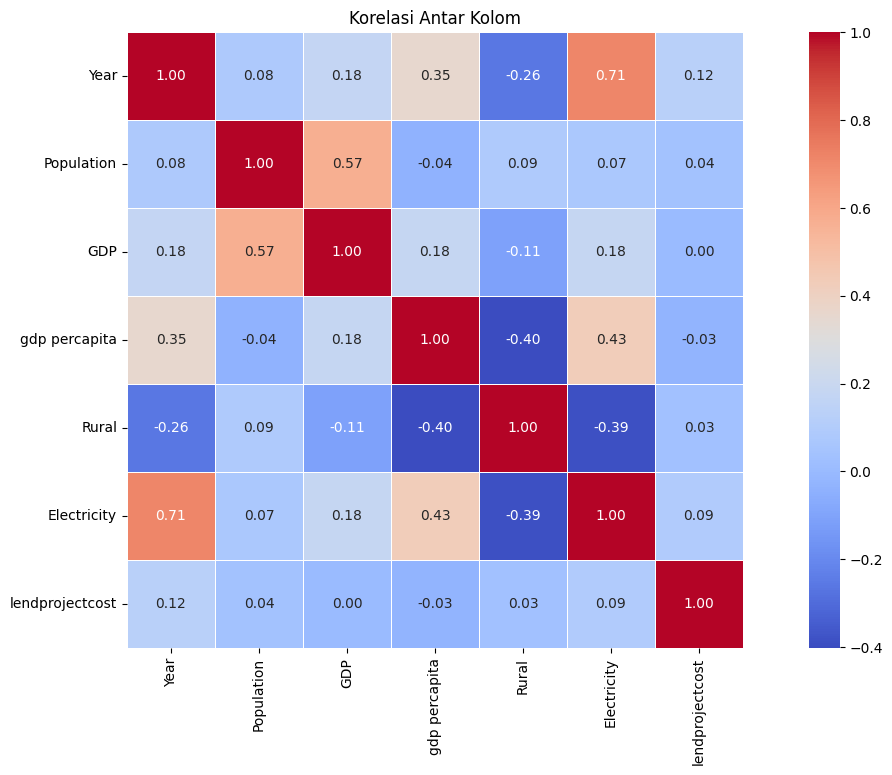

In [143]:
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Analisis Korelasi
correlation = numeric_columns.corr()

# Visualisasi Korelasi dengan heatmap menggunakan Seaborn
plt.figure(figsize=(17, 8))
sns.heatmap(correlation, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            linewidths=0.5,
            square=True,)  # Untuk membuat persegi panjang
plt.title('Korelasi Antar Kolom')
plt.show()

### Analisis Distribusi

In [144]:
data = pd.DataFrame({
    'GDP': data['GDP'],  # Menggunakan data yang sudah ada dalam DataFrame
    'Population': data['Population'],  # Menggunakan data yang sudah ada dalam DataFrame
    'gdp percapita': data['gdp percapita']  # Menggunakan data yang sudah ada dalam DataFrame
})

# Visualisasi distribusi menggunakan histogram
fig1 = px.histogram(data, x='GDP', title='Distribusi GDP', marginal='box')
fig2 = px.histogram(data, x='Population', title='Distribusi Populasi', marginal='box')
fig3 = px.histogram(data, x='gdp percapita', title='Distribusi GDP per Kapita', marginal='box')

# Tampilkan visualisasi
fig1.show()
fig2.show()
fig3.show()

### Analisis Tren

In [158]:
# Analisis tren GDP per Capita dari waktu ke waktu
data = pd.read_csv('data_combined/data_final.csv')
# Analisis tren GDP dari waktu ke waktu
fig_gdp_trend = px.scatter(data, x='Year', y='GDP', color='Country Name',
                           title='Tren GDP',
                           labels={'Year': 'Tahun', 'GDP': 'GDP'},
                           hover_name='Country Name')

# Analisis tren populasi dari waktu ke waktu
fig_population_trend = px.scatter(data, x='Year', y='Population', color='Country Name',
                                  title='Tren Populasi',
                                  labels={'Year': 'Tahun', 'Population': 'Populasi'},
                                  hover_name='Country Name')

# Analisis tren GDP per Capita dari waktu ke waktu
fig_gdp_per_capita_trend = px.scatter(data, x='Year', y='gdp percapita', color='Country Name',
                                      title='Tren GDP per Capita',
                                      labels={'Year': 'Tahun', 'gdp percapita': 'GDP per Capita'},
                                      hover_name='Country Name')

# Mengatur layout agar lebih rapi
fig_gdp_trend.update_layout(template='plotly_white')
fig_population_trend.update_layout(template='plotly_white')
fig_gdp_per_capita_trend.update_layout(template='plotly_white')

# Menampilkan semua plot
fig_gdp_trend.show()
fig_population_trend.show()
fig_gdp_per_capita_trend.show()



In [172]:
data = pd.read_csv('data_combined/data_final.csv')
fig = px.bar(data, x='Country Name', y='lendprojectcost', 
             title='Perbandingan Total Biaya Proyek berdasarkan Negara',
             labels={'Country Name': 'Negara', 'lendprojectcost': 'Total Biaya Proyek'},
             color='Country Name', # Menggunakan warna berbeda untuk setiap negara
             color_continuous_scale=px.colors.qualitative.Set1) 

# Tambahkan gridlines
fig.update_layout(xaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGrey'),
                  yaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGrey'))

# Sesuaikan ukuran plot
fig.update_layout(width=1000, height=600)

# Tampilkan plot
fig.show()
